In [3]:
import pandas as pd
import openpyxl





In [4]:
#pd.set_option("display.max_rows", None)

listaEmprestimo = []

for x in range(0,10):# criei um loop para executar 10 vezes o X vai assumir o valor de 0 até 9
    for y in range(1,3):# criei outro loop dentro do loop anterior, para executar 2 vezes, já que tenho arquivo 2020.1 e 2020.2  p y vai receber 1 e 2
        tabela1= pd.read_csv(f"dados_emprestimos\emprestimos-201{x}{y}.csv")# com o x recebendo 0 e o Y recebendo 1 e depois 2 os dados ficam salvos na variável
    listaEmprestimo.append(tabela1)# dentro da lista listaEmprestimo os dados são salvos, já que na variável tabela1 serão apagados no segundo loop
tabela = pd.read_csv("dados_emprestimos\emprestimos-20201.csv") # salva na variável tabela o valor do CSV final 20201 * vou melhorar isso depoislistaEmprestimo.append(tabela) # salva esse último dado na listalistaEmprestimo    
dfconca1= pd.concat(listaEmprestimo)#com os dados da lista listaEmprestimo, criei um 

display(dfconca1)


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,799100,S025602_19/11/2013 10:51:34,NaN,2010/07/01 07:45:41.111000000,2010/07/07 10:52:31.000000000,2.009050e+09,ALUNO DE GRADUAÇÃO
1,799101,2008049500,NaN,2010/07/01 08:08:17.690000000,2010/07/01 09:03:44.000000000,2.010056e+09,ALUNO DE GRADUAÇÃO
2,799102,X008043,NaN,2010/07/01 08:13:31.574000000,2010/07/09 15:14:44.000000000,2.009043e+09,ALUNO DE GRADUAÇÃO
3,799103,2009055438,2010/07/14 18:35:35.042000000,2010/07/01 08:22:46.085000000,2010/07/29 14:59:16.000000000,2.009054e+09,ALUNO DE GRADUAÇÃO
4,799104,S024636,2010/07/16 21:29:43.569000000,2010/07/01 08:40:28.512000000,2010/07/28 07:49:32.000000000,2.009054e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
83682,2962504,2008047075,2020/01/13 23:27:18.346000000,2019/12/30 17:48:52.962000000,2020/01/15 18:52:27.000000000,2.019006e+10,ALUNO DE GRADUAÇÃO
83683,2962505,2014078494,2020/01/13 23:27:18.327000000,2019/12/30 17:48:52.998000000,2020/01/15 15:28:51.000000000,2.019006e+10,ALUNO DE GRADUAÇÃO
83684,2962506,2018014453,2020/01/13 23:27:18.302000000,2019/12/30 17:48:53.039000000,2020/01/15 15:29:08.000000000,2.019006e+10,ALUNO DE GRADUAÇÃO
83685,2962507,2010073307,NaN,2019/12/30 18:05:30.265000000,2020/01/29 16:05:27.000000000,2.018102e+10,ALUNO DE PÓS-GRADUAÇÃO


In [5]:
dados_exp = pd.read_parquet("dados_exemplares.parquet")#importa dentro da variável dados_exp os dados do arquivo dados_exemplares.parquet
dados_exp

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


In [6]:
dfcomp = pd.merge( dados_exp, dfconca1, indicator=True, how="outer" )

In [5]:
import math

#dfcomp.to_excel("Teste.xlsx")
tamanho =  math.ceil(len(dfcomp) /808575)
lisSep =[]

for i in range(tamanho):
    inicio = i * 808575
    fim = (i+1)* 808575
    separado = dfcomp.iloc[inicio:fim]
    lisSep.append(separado)

lisSep

NameError: name 'dfcomp' is not defined

In [71]:
for i, arquivo in enumerate(lisSep):
    link = f"Dataframe{i+1}.xlsx"
    #display(arquivo)
    arquivo.to_excel(link, index=False)


In [7]:
dfcomp= dfcomp.drop("registro_sistema", axis=1 )




In [8]:
dfcomp['matricula_ou_siape'] = dfcomp['matricula_ou_siape'].map(str).str.replace(".0","") #usando a função map() para converter a coluna em String


In [9]:
dfcomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436365 entries, 0 to 1436364
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id_exemplar           1348251 non-null  float64 
 1   codigo_barras         1436365 non-null  object  
 2   colecao               1348251 non-null  object  
 3   biblioteca            1348251 non-null  object  
 4   status_material       1348251 non-null  object  
 5   localizacao           1348251 non-null  float64 
 6   id_emprestimo         1081359 non-null  float64 
 7   data_renovacao        463248 non-null   object  
 8   data_emprestimo       1081359 non-null  object  
 9   data_devolucao        1081125 non-null  object  
 10  matricula_ou_siape    1436365 non-null  object  
 11  tipo_vinculo_usuario  1081359 non-null  object  
 12  _merge                1436365 non-null  category
dtypes: category(1), float64(3), object(9)
memory usage: 132.9+ MB


In [11]:



def CDU_nova (valor):

    if (valor < 100):
        return "Generalidades. Ciência e conhecimento"
    elif (valor < 200):
        return "Filosofia e psicologia"
    elif (valor < 300):
        return "Religião"
    elif (valor < 400):
        return "Ciências sociais"
    elif (valor < 500):
        return "Classe vaga. Provisoriamente não ocupada"
    elif (valor < 600):
        return "Matemática e ciências naturais"
    elif (valor < 700):
        return "Ciências aplicadas"
    elif (valor < 800):
        return "Belas artes"
    elif (valor < 900):
        return "Belas artes "
    elif (valor < 1000):
        return "Geografia. Biografia. História"

dfcomp["CDU"] = dfcomp['localizacao'].apply(CDU_nova)
#cria uma coluna nova e com base na coluna localização, aplica a função CDU_nova, o valor inserido na linha entra como valor da função


In [12]:
Mudar = ["data_renovacao","data_emprestimo","data_devolucao"]

for i in dfcomp[Mudar]:
    dfcomp[i] = dfcomp[i].str.replace("/","-")




In [13]:

Mudar = ["data_renovacao","data_emprestimo","data_devolucao"]
#dfcomp = pd.to_datetime(dfcomp[Mudar], format='%Y%m%d', errors='ignore')
#dfcomp[Mudar]= pd.to_datetime(dfcomp[Mudar])#.apply(lambda x : x.dt.year)
for x in Mudar:

    dfcomp[x] = pd.to_datetime(dfcomp[x])

#dfcomp["data_renovacao"] = pd.to_datetime(dfcomp["data_renovacao"], format="%d-%m-%Y", errors="ignore")


#dfcomp = [pd.to_datetime(dfcomp[i], format='%d/%m/%Y') for i in dfcomp[Mudar] ]
#dfcomp.info()


In [14]:
dfcomp.info()
dfcomp.dropna(subset= "data_emprestimo", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436365 entries, 0 to 1436364
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id_exemplar           1348251 non-null  float64       
 1   codigo_barras         1436365 non-null  object        
 2   colecao               1348251 non-null  object        
 3   biblioteca            1348251 non-null  object        
 4   status_material       1348251 non-null  object        
 5   localizacao           1348251 non-null  float64       
 6   id_emprestimo         1081359 non-null  float64       
 7   data_renovacao        463248 non-null   datetime64[ns]
 8   data_emprestimo       1081359 non-null  datetime64[ns]
 9   data_devolucao        1081125 non-null  datetime64[ns]
 10  matricula_ou_siape    1436365 non-null  object        
 11  tipo_vinculo_usuario  1081359 non-null  object        
 12  _merge                1436365 non-null  ca

In [16]:
from datetime import datetime
dfcomp["Ano"] = dfcomp["data_emprestimo"].dt.year.astype(int)
dfcomp["Mes"] = dfcomp["data_emprestimo"].dt.month.astype(int)
dfcomp["Dia"] = dfcomp["data_emprestimo"].dt.day.astype(int)
dfcomp["Hora"] = dfcomp["data_emprestimo"].dt.hour.astype(int)

#vetor = dfcomp["Ano"].dt.year
#vetor = vetor.datetime.datetime.year
dfcomp


,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,_merge,CDU,Ano,Mes,Dia,Hora
14,27.0,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691.0,818501.0,NaT,2010-08-17 17:00:04.440,2010-08-17 17:09:15,2010059654,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2010,8,17,17
24,43.0,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616.0,2037061.0,2015-08-24 21:55:47.110,2015-08-03 10:39:42.972,2015-10-19 08:52:30,2013034289,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2015,8,3,10
52,100.0,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650.0,800617.0,2010-07-21 11:39:18.519,2010-07-06 12:24:32.049,2010-08-09 17:54:20,2008031519,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2010,7,6,12
53,100.0,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650.0,1777409.0,2014-08-04 15:18:17.585,2014-07-18 11:12:45.416,2014-08-20 08:22:38,2012935478,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2014,7,18,11
55,102.0,L136078,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,610.0,819393.0,NaT,2010-08-18 15:38:57.170,2010-09-13 17:55:00,2010101332,ALUNO DE PÓS-GRADUAÇÃO,both,Ciências aplicadas,2010,8,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436360,NaN,C017857,NaN,NaN,NaN,NaN,2961958.0,2020-01-18 10:55:31.325,2019-12-20 08:47:33.864,2020-02-18 14:24:07,20192014512,ALUNO DE PÓS-GRADUAÇÃO,right_only,None,2019,12,20,8
1436361,NaN,L115715,NaN,NaN,NaN,NaN,2962007.0,2020-01-19 03:04:40.200,2019-12-20 12:17:32.981,2020-02-17 17:37:19,20192002450,ALUNO DE PÓS-GRADUAÇÃO,right_only,None,2019,12,20,12
1436362,NaN,Y021157,NaN,NaN,NaN,NaN,2962191.0,2020-01-09 11:38:57.369,2019-12-23 16:47:56.396,2020-01-31 11:02:58,20190022453,ALUNO DE GRADUAÇÃO,right_only,None,2019,12,23,16
1436363,NaN,L203120,NaN,NaN,NaN,NaN,2962493.0,2020-01-14 08:59:01.407,2019-12-30 16:30:58.224,2020-02-13 14:21:34,1125233,DOCENTE,right_only,None,2019,12,30,16


In [17]:

DadosAnalise = dfcomp.groupby(by=["Hora"]).count()
#DadosAnalise["id_exemplar"].sum
#DadosAnalise.to_excel("dadosok.xlsx")
DadosAnalise = DadosAnalise[["data_emprestimo", "_merge" ]]
#DadosAnalise = DadosAnalise.rename(columns=  {"data_emprestimo": "Quantidade_emprestimo"})
#DadosAnalise2 = dfcomp["data_emprestimo"]
#DadosAnalise3 = DadosAnalise.merge(DadosAnalise2 , left_index=True, right_index=True)
#
DadosAnalise

,data_emprestimo,_merge
Hora,,
0,61,61
6,15,15
7,10225,10225
8,53973,53973
9,69452,69452
10,95592,95592
11,90070,90070
12,74068,74068
13,65233,65233


d:\Programas\python\lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_merge' of <matplotlib.lines.Line2D object at 0x000002BA5813C070> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


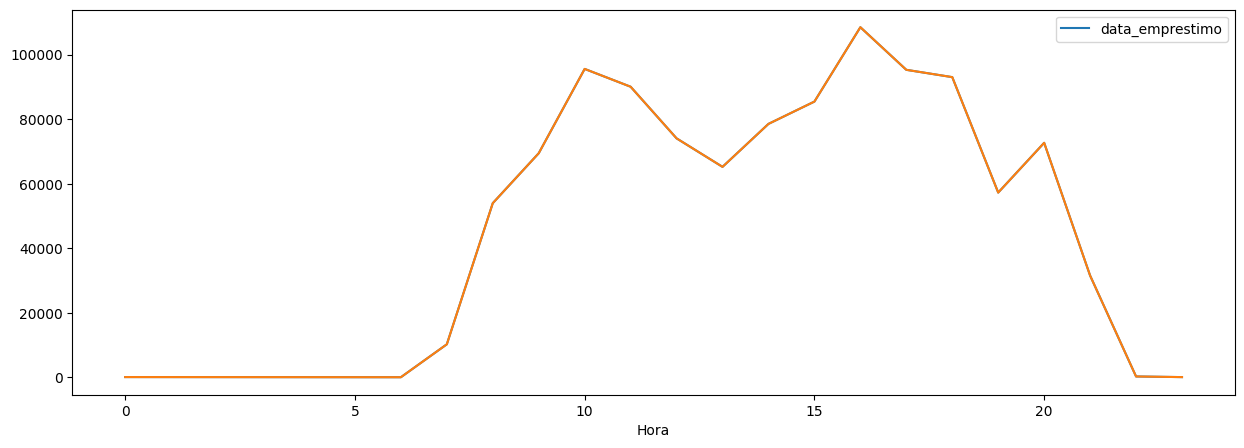

In [18]:

teste= DadosAnalise.plot(figsize=(15,5))

In [19]:
PlanFerias = dfcomp[["data_emprestimo", ]]
PlanFerias

,data_emprestimo
14,2010-08-17 17:00:04.440
24,2015-08-03 10:39:42.972
52,2010-07-06 12:24:32.049
53,2014-07-18 11:12:45.416
55,2010-08-18 15:38:57.170
...,...
1436360,2019-12-20 08:47:33.864
1436361,2019-12-20 12:17:32.981
1436362,2019-12-23 16:47:56.396
1436363,2019-12-30 16:30:58.224


In [20]:
DF_coleta = dfcomp[["biblioteca","tipo_vinculo_usuario", "colecao", "data_emprestimo"]]
DF_coleta = DF_coleta.groupby(by=["biblioteca","tipo_vinculo_usuario", "colecao"]).count()
DF_coleta.sort_values(by="data_emprestimo",ascending=True , inplace=True)
DF_coleta.sort_values(by="tipo_vinculo_usuario",ascending=False , inplace=True)
DF_coleta

,,,data_emprestimo
biblioteca,tipo_vinculo_usuario,colecao,
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,USUÁRIO EXTERNO,Multimeios,1
Biblioteca Setorial Árvore do Conhecimento - Instituto do Cérebro - ICe,USUÁRIO EXTERNO,Acervo Circulante,4
Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA,USUÁRIO EXTERNO,Acervo Circulante,4
Biblioteca Setorial do Departamento de Artes - DEART,USUÁRIO EXTERNO,Acervo Circulante,14
Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET,USUÁRIO EXTERNO,Acervo Circulante,20
...,...,...,...
Biblioteca Central Zila Mamede,ALUNO DE GRADUAÇÃO,Eventos,14
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,ALUNO DE GRADUAÇÃO,Obras de Referência,14
Biblioteca Setorial Pe. Jaime Diniz - Escola de Música - EMUFRN,ALUNO DE GRADUAÇÃO,Folhetos,16


In [21]:
colecao = dfcomp[["colecao", "data_emprestimo"]]
colecao = colecao.groupby(by="colecao").count()
colecao.sort_values(by="data_emprestimo", ascending = True, inplace=True)
colecao

,data_emprestimo
colecao,
Obras Raras,4
Coleção Zila Mamede,13
Literatura de Cordel,13
Coleção Mossoroense,24
Eventos,43
Necessidades Educacionais Específicas,50
Trabalho Acadêmico,66
Folhetos,138
Teses,324


In [22]:
biblioteca = dfcomp[["biblioteca", "data_emprestimo"]]
biblioteca = biblioteca.groupby(by="biblioteca").count()
biblioteca.sort_values(by="data_emprestimo", ascending=True, inplace=True)
biblioteca

,data_emprestimo
biblioteca,
Biblioteca Setorial do Núcleo de Ensino Superior do Agreste - NESA - Nova Cruz,323
Biblioteca Setorial Árvore do Conhecimento - Instituto do Cérebro - ICe,433
Biblioteca Setorial Moacyr de Góes - CE,487
Biblioteca Setorial Prof. Horácio Nicolas Solimo - ­ Engenharia Química - EQ - CT,2086
Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - ­CT,2348
Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA,5052
Biblioteca Setorial Prof. Leopoldo Nelson - ­Centro de Biociências - CB,5987
Biblioteca Setorial do Departamento de Artes - DEART,8417
Biblioteca Setorial Pe. Jaime Diniz - Escola de Música - EMUFRN,10403


<Axes: xlabel='Ano,Mes,colecao,tipo_vinculo_usuario'>

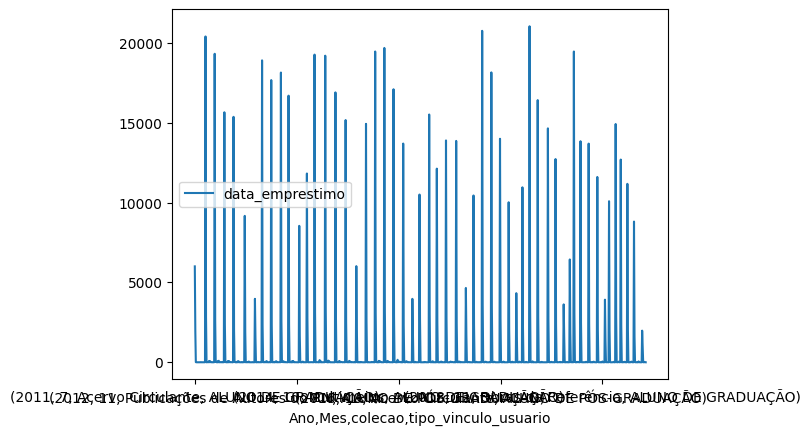

In [30]:
valida = dfcomp.loc[(dfcomp["tipo_vinculo_usuario"] == "ALUNO DE GRADUAÇÃO") | (dfcomp["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO") ]
valida = valida.loc[(valida["Ano"] > 2010) & (valida["Ano"] < 2020) ]
Analise_quar = valida[["colecao","tipo_vinculo_usuario", "data_emprestimo", "Ano", "Mes"]]
Analise_quar = Analise_quar.groupby(by=["Ano", "Mes", "colecao", "tipo_vinculo_usuario"]).count()
Analise_quar.plot()

In [33]:
f_emprestimo = dfcomp.loc[(dfcomp["tipo_vinculo_usuario"] == "ALUNO DE GRADUAÇÃO") | (dfcomp["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO")]
f_emprestimo = dfcomp.loc[(dfcomp["Ano"] >= 2010) & (dfcomp["Ano"]<=2020)]
f_emprestimo = dfcomp.groupby(by=["Ano", "Mes", "tipo_vinculo_usuario"]).count()
f_emprestimo

id_exemplar  \
Ano  Mes data_emprestimo         tipo_vinculo_usuario                  
2010 7   2010-07-01 07:40:20.000 DOCENTE                           0   
         2010-07-01 07:40:26.000 DOCENTE                           0   
         2010-07-01 07:40:35.000 DOCENTE                           0   
         2010-07-01 07:45:41.111 ALUNO DE GRADUAÇÃO                1   
         2010-07-01 08:00:58.000 ALUNO DE GRADUAÇÃO                0   
...                                                              ...   
2019 12  2019-12-30 17:48:52.962 ALUNO DE GRADUAÇÃO                1   
         2019-12-30 17:48:52.998 ALUNO DE GRADUAÇÃO                1   
         2019-12-30 17:48:53.039 ALUNO DE GRADUAÇÃO                1   
         2019-12-30 18:05:30.265 ALUNO DE PÓS-GRADUAÇÃO            1   
         2019-12-30 18:05:30.313 ALUNO DE PÓS-GRADUAÇÃO            1   

                                                         codigo_barras  \
Ano  Mes data_emprestimo         tipo_vinculo_usuario                    
2010 7   2010-07-01 07:40:20.000 DOCENTE                             1   
         2010-07-01 07:40:26.000 DOCENTE                             1   
         2010-07-01 07:40:35.000 DOCENTE                             1   
         2010-07-01 07:45:41.111 ALUNO DE GRADUAÇÃO                  1   
         2010-07-01 08:00:58.000 ALUNO DE GRADUAÇÃO                  1   
...                                                                ...   
2019 12  2019-12-30 17:48:52.962 ALUNO DE GRADUAÇÃO                  1   
         2019-12-30 17:48:52.998 ALUNO DE GRADUAÇÃO                  1   
         2019-12-30 17:48:53.039 ALUNO DE GRADUAÇÃO                  1   
         2019-12-30 18:05:30.265 ALUNO DE PÓS-GRADUAÇÃO              1   
         2019-12-30 18:05:30.313 ALUNO DE PÓS-GRADUAÇÃO              1   

                                                         colecao  biblioteca  \
Ano  Mes data_emprestimo         tipo_vinculo_usuario                          
2010 7   2010-07-01 07:40:20.000 DOCENTE                       0           0   
         2010-07-01 07:40:26.000 DOCENTE                       0           0   
         2010-07-01 07:40:35.000 DOCENTE                       0           0   
         2010-07-01 07:45:41.111 ALUNO DE GRADUAÇÃO            1           1   
         2010-07-01 08:00:58.000 ALUNO DE GRADUAÇÃO            0           0   
...                                                          ...         ...   
2019 12  2019-12-30 17:48:52.962 ALUNO DE GRADUAÇÃO            1           1   
         2019-12-30 17:48:52.998 ALUNO DE GRADUAÇÃO            1           1   
         2019-12-30 17:48:53.039 ALUNO DE GRADUAÇÃO            1           1   
         2019-12-30 18:05:30.265 ALUNO DE PÓS-GRADUAÇÃO        1           1   
         2019-12-30 18:05:30.313 ALUNO DE PÓS-GRADUAÇÃO        1           1   

                                                         status_material  \
Ano  Mes data_emprestimo         tipo_vinculo_usuario                      
2010 7   2010-07-01 07:40:20.000 DOCENTE                               0   
         2010-07-01 07:40:26.000 DOCENTE                               0   
         2010-07-01 07:40:35.000 DOCENTE                               0   
         2010-07-01 07:45:41.111 ALUNO DE GRADUAÇÃO                    1   
         2010-07-01 08:00:58.000 ALUNO DE GRADUAÇÃO                    0   
...                                                                  ...   
2019 12  2019-12-30 17:48:52.962 ALUNO DE GRADUAÇÃO                    1   
         2019-12-30 17:48:52.998 ALUNO DE GRADUAÇÃO                    1   
         2019-12-30 17:48:53.039 ALUNO DE GRADUAÇÃO                    1   
         2019-12-30 18:05:30.265 ALUNO DE PÓS-GRADUAÇÃO                1   
         2019-12-30 18:05:30.313 ALUNO DE PÓS-GRADUAÇÃO                1   

                                                         localizacao  \
Ano  Mes data_emprestimo         tipo_vinculo_usuario  